# LendingClub Loans Analysis

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

In [2]:
loans_data = pd.read_csv("../clean_data/loans_data.csv")

In [3]:
loans_data.head(20)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,state_name,grade,fico_range,credit_score
0,5000.0,36 months,10.65,162.87,10+ years,RENT,24000.0,Verified,2011,Fully Paid,...,0,36.208219,1.0,3.0,0,83.7,Arizona,B,737.0,Good
1,5000.0,36 months,7.90,156.46,2 - 4 years,RENT,36000.0,Source Verified,2011,Fully Paid,...,0,16.361644,3.0,9.0,0,28.3,Arizona,A,732.0,Good
2,6500.0,60 months,14.65,153.45,5 - 9 years,OWN,72000.0,Not Verified,2011,Fully Paid,...,0,23.200000,2.0,14.0,0,20.6,Arizona,C,697.0,Good
3,6000.0,36 months,12.42,200.50,< 2 years,RENT,36852.0,Source Verified,2011,Fully Paid,...,0,13.947945,1.0,7.0,0,66.5,Arizona,B,697.0,Good
4,12000.0,36 months,16.29,423.61,5 - 9 years,RENT,88365.0,Verified,2011,Fully Paid,...,0,24.452055,0.0,6.0,0,96.4,Arizona,D,682.0,Good
5,6000.0,36 months,13.49,203.59,5 - 9 years,RENT,50000.0,Not Verified,2011,Fully Paid,...,0,17.032877,1.0,6.0,0,91.5,Arizona,C,692.0,Good
6,5600.0,36 months,14.65,193.17,< 2 years,MORTGAGE,85000.0,Not Verified,2011,Charged Off,...,1,21.871233,3.0,8.0,0,90.8,Arizona,C,677.0,Good
7,7400.0,36 months,13.49,251.09,< 2 years,OWN,25000.0,Source Verified,2011,Fully Paid,...,0,31.043836,0.0,5.0,0,92.8,Arizona,C,692.0,Good
8,24250.0,60 months,23.91,519.76,5 - 9 years,MORTGAGE,120000.0,Verified,2011,Fully Paid,...,0,20.950685,3.0,7.0,0,99.0,Arizona,G,672.0,Good
9,2500.0,36 months,11.71,82.69,5 - 9 years,MORTGAGE,29000.0,Verified,2011,Fully Paid,...,0,15.528767,0.0,5.0,0,66.7,Arizona,B,687.0,Good


# Summary of Statistics

In [4]:
loans_data.describe()

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_util,fico_range
count,38284.000000,38284.000000,38284.000000,3.828400e+04,38284.000000,38284.000000,38284.000000,38284.000000,38284.000000,38284.000000,38284.000000
mean,11156.807021,12.000834,323.266224,6.885303e+04,2010.369998,13.346091,24.120052,0.869188,9.290121,48.850521,717.060469
std,7408.188582,3.726761,208.280410,6.347098e+04,0.807165,6.669822,6.838040,1.068543,4.380740,28.317101,35.820829
min,500.000000,5.420000,16.080000,4.000000e+03,2007.000000,0.000000,12.358904,0.000000,2.000000,0.000000,662.000000
25%,5500.000000,8.940000,166.630000,4.032000e+04,2010.000000,8.210000,19.531507,0.000000,6.000000,25.400000,687.000000
50%,10000.000000,11.860000,278.970000,5.900000e+04,2011.000000,13.440000,22.871233,1.000000,9.000000,49.300000,712.000000
75%,15000.000000,14.590000,427.180000,8.200000e+04,2011.000000,18.620000,27.287671,1.000000,12.000000,72.400000,742.000000
max,35000.000000,24.590000,1305.190000,6.000000e+06,2011.000000,29.990000,75.235616,8.000000,44.000000,99.900000,827.000000


# Loans Status

In [5]:
plt.rcParams['figure.figsize'] = [5, 4.5]
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10

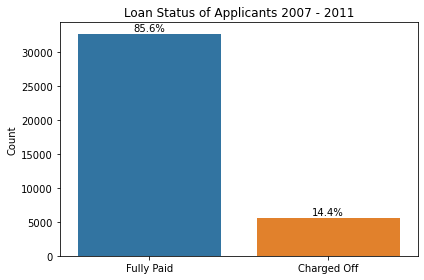

<Figure size 432x288 with 0 Axes>

In [8]:
ax = sns.countplot(x = "loan_status", data = loans_data, 
                   order = loans_data["loan_status"].value_counts().index)
plt.xlabel("")
plt.ylabel("Count")
plt.title("Loan Status of Applicants 2007 - 2011")

total = len(loans_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()
plt.savefig("loan_status.png")

Only 86.6% of all loans are fully paid so there is room for improvement.

# Purpose for Applying for a Loan

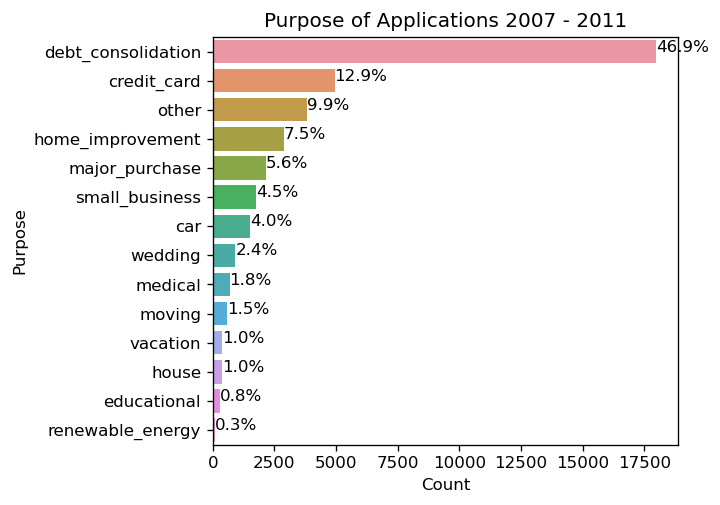

In [7]:
ax = sns.countplot(y = "purpose", data = loans_data, 
                   order = loans_data["purpose"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Purpose")
plt.title("Purpose of Applications 2007 - 2011")

total = len(loans_data['purpose'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Debt Consolidation is the reason most people apply for a loan. 

## Home Ownership

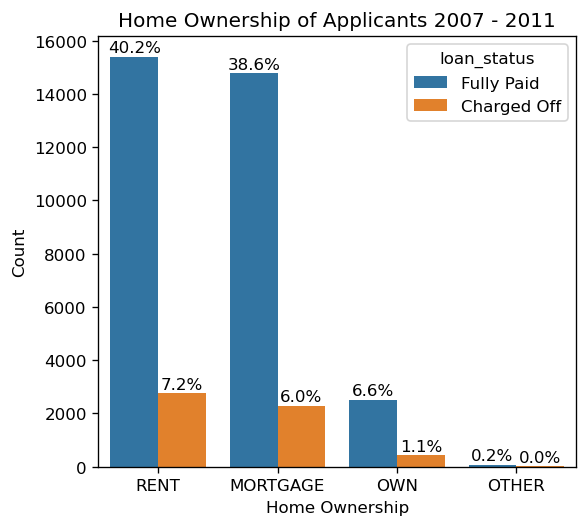

In [8]:
ax = sns.countplot(x = "home_ownership", data = loans_data, hue = "loan_status", 
                   order = loans_data["home_ownership"].value_counts().index)

plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.title("Home Ownership of Applicants 2007 - 2011")

total = len(loans_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Those who rent form the highest proportion of all applications, followed by mortgage then those who own their home outright.

## Employment Length

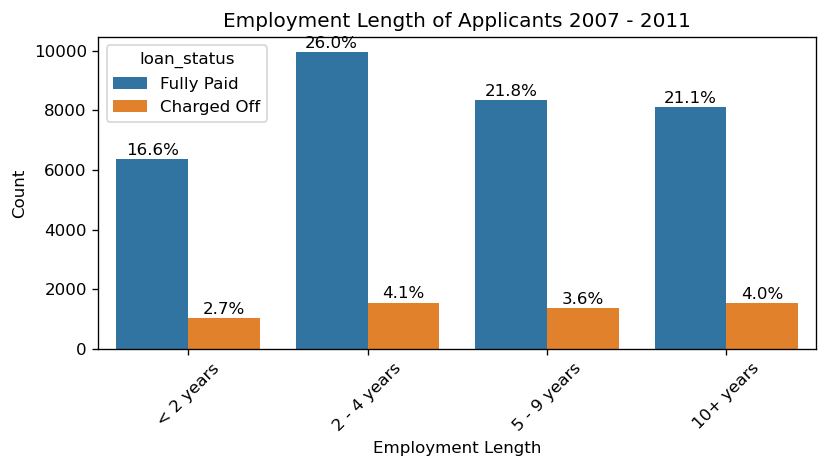

In [9]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x = "emp_length", data = loans_data, hue = "loan_status",
                  order = ['< 2 years','2 - 4 years','5 - 9 years','10+ years'])

plt.xticks(rotation = 45) 
plt.xlabel("Employment Length")
plt.ylabel("Count")
plt.title("Employment Length of Applicants 2007 - 2011")

total = len(loans_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

The majority of applicants have been employed between 2-4 years. However, the band which has the highest proportion of loans that were charged off is those in employment 10 years of more.

## Fico Score

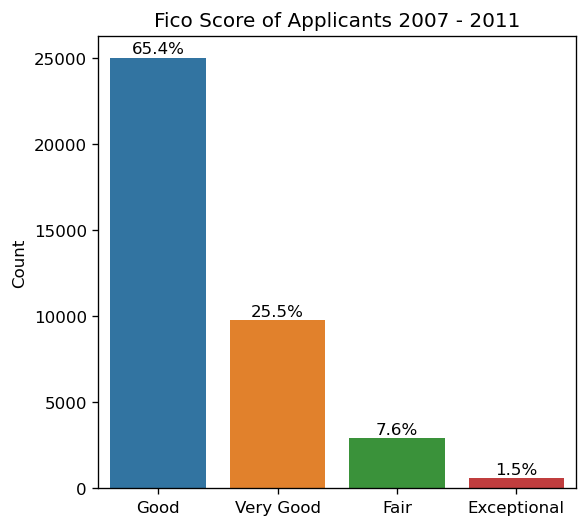

In [10]:
ax = sns.countplot(x = "credit_score", data = loans_data, 
                   order = loans_data["credit_score"].value_counts().index)

plt.xlabel("")
plt.ylabel("Count")
plt.title("Fico Score of Applicants 2007 - 2011")

total = len(loans_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

There are no surprises here, as it is expected that good and very good scores would be granted a loan. There a no applicants with a poor score.

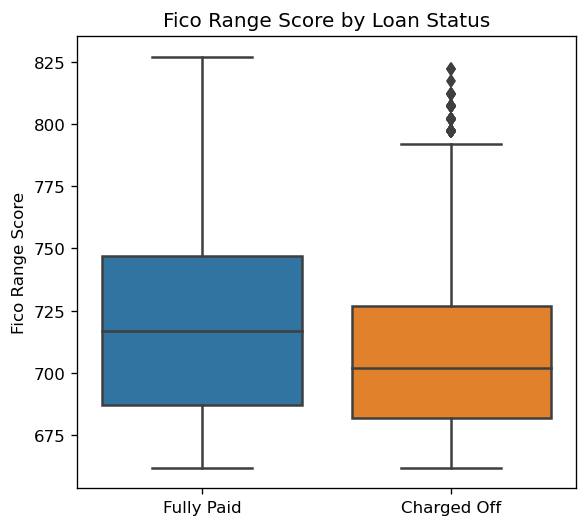

In [64]:
ax = sns.boxplot(x = "loan_status", y = "fico_range", data = loans_data)

plt.xlabel("")
plt.ylabel("Fico Range Score")
plt.title("Fico Range Score by Loan Status")
plt.tight_layout()

The median of the "Fully Paid" boxplot is higher than the "Charged Off" boxplot. This shows the those with a higher fico range score were more likely to have fully paid their loan than those with a lower fico score.

## Verification Status

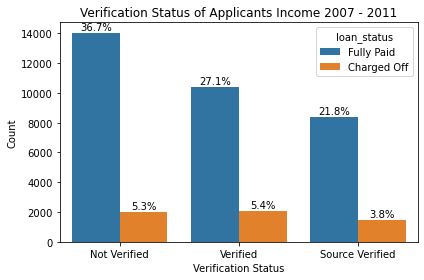

In [9]:
ax = sns.countplot(x = "verification_status", data = loans_data, hue = "loan_status",
                   order = loans_data["verification_status"].value_counts().index)

plt.xlabel("Verification Status")
plt.ylabel("Count")
plt.title("Verification Status of Applicants Income 2007 - 2011")

total = len(loans_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Verification status indicates whether income was verified by the lending company. Verification status indicates whether income was verified by the lending company. Applicants who had not had their income verified however, had the lowest proportion of charged off loans from that category.

In [32]:
loans_data['verification_status'].describe()

count            38284
unique               3
top       Not Verified
freq             16054
Name: verification_status, dtype: object

## Loan Term

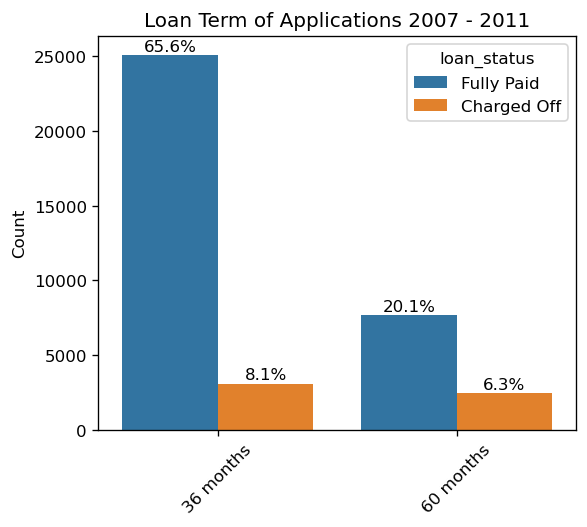

In [12]:
ax = sns.countplot(x = "term", data = loans_data, hue = "loan_status")

plt.xticks(rotation = 45) 
plt.xlabel("")
plt.ylabel("Count")
plt.title("Loan Term of Applications 2007 - 2011")

total = len(loans_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

From the plot we can see that there is a higher proportion of 60 month term loans being charged off then those fully paid of the same term.

In [31]:
loans_data['term'].describe()

count         38284
unique            2
top       36 months
freq          28188
Name: term, dtype: object

## Grade

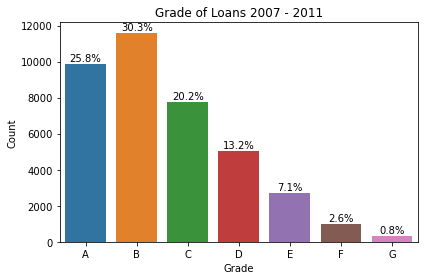

In [5]:
ax = sns.countplot(x = "grade", data = loans_data, order = ['A','B','C','D','E','F','G'])

plt.xlabel("Grade")
plt.ylabel("Count")
plt.title("Grade of Loans 2007 - 2011")
plt.tight_layout()

total = len(loans_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

In [30]:
loans_data['grade'].describe()

count     38284
unique        7
top           B
freq      11596
Name: grade, dtype: object

## Location - States

Text(0.5, 1.0, 'Number of Loan Applications by State 2007 - 2011')

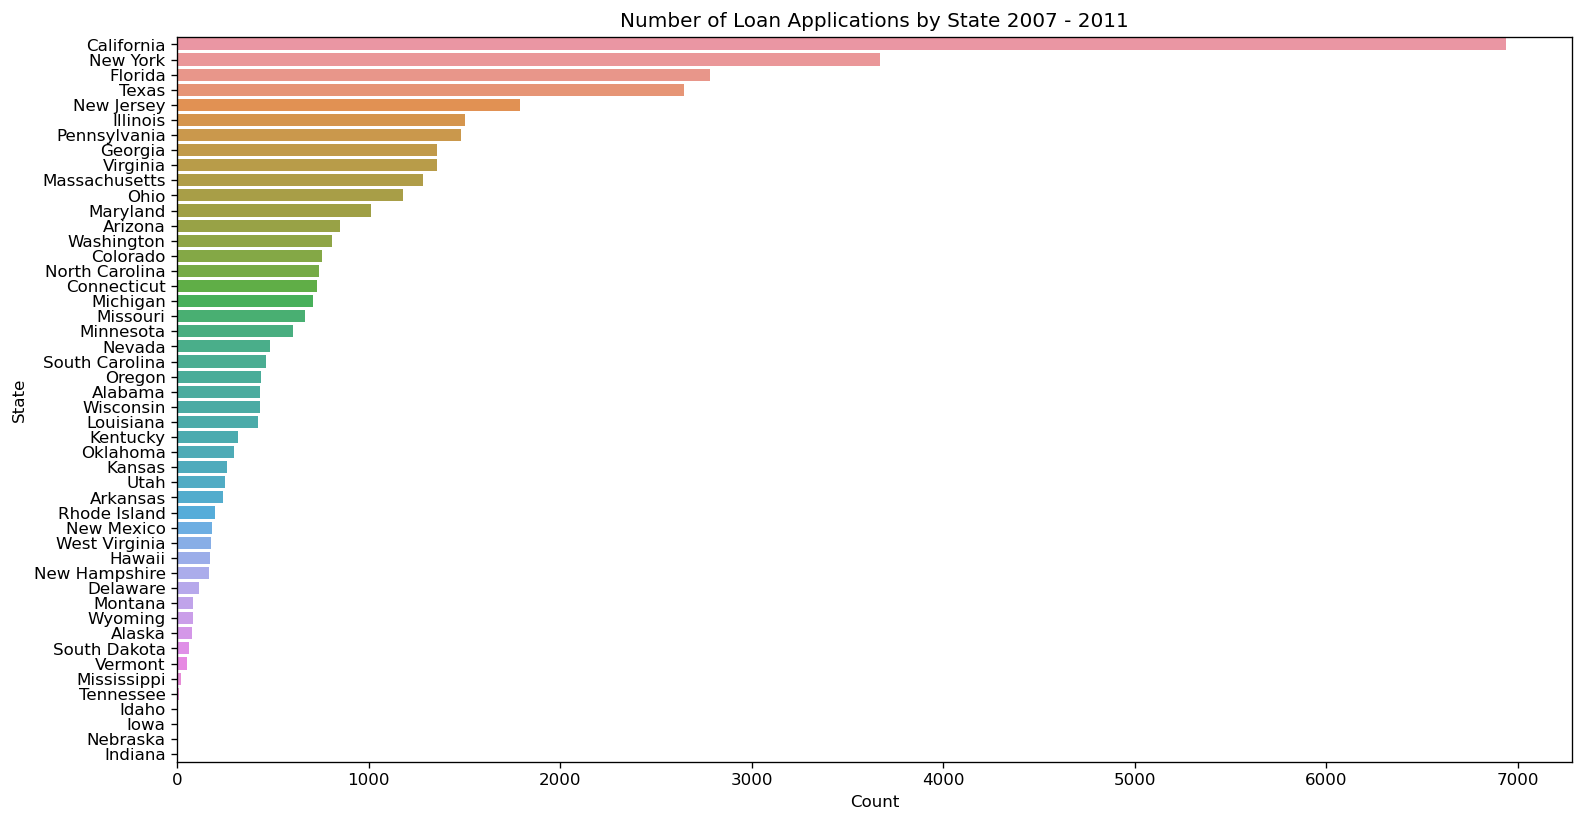

In [14]:
plt.figure(figsize=(15,8))
ax = sns.countplot(y = "state_name", data = loans_data, 
                   order = loans_data["state_name"].value_counts().index)

plt.xlabel("Count")
plt.ylabel("State")
plt.title("Number of Loan Applications by State 2007 - 2011")

Most applicants are from California (almost double that of the second highest - New York). 

## Max Annual Income by State

Obtaining the maximum annual incomes for each state.

In [15]:
state_max_income = loans_data.groupby("state_name")["annual_inc"].max().reset_index(name = "max_annual_income")

#showing the top ten states with highest maximum annual income
state_max_income.nlargest(10, "max_annual_income")

,state_name,max_annual_income
4,California,6000000.0
29,New Mexico,3900000.0
40,Texas,1900000.0
30,New York,1782000.0
5,Colorado,1362000.0
20,Michigan,1250000.0
6,Connecticut,1200000.0
17,Louisiana,1200000.0
28,New Jersey,1200000.0
18,Maryland,1176000.0


## Mean Annual Income by State


Obtaining mean annual incomes for each state.

In [16]:
state_mean_income = loans_data.groupby("state_name")["annual_inc"].mean().reset_index(name = "mean_annual_income")

Text(0, 0.5, 'Mean Annual Income')

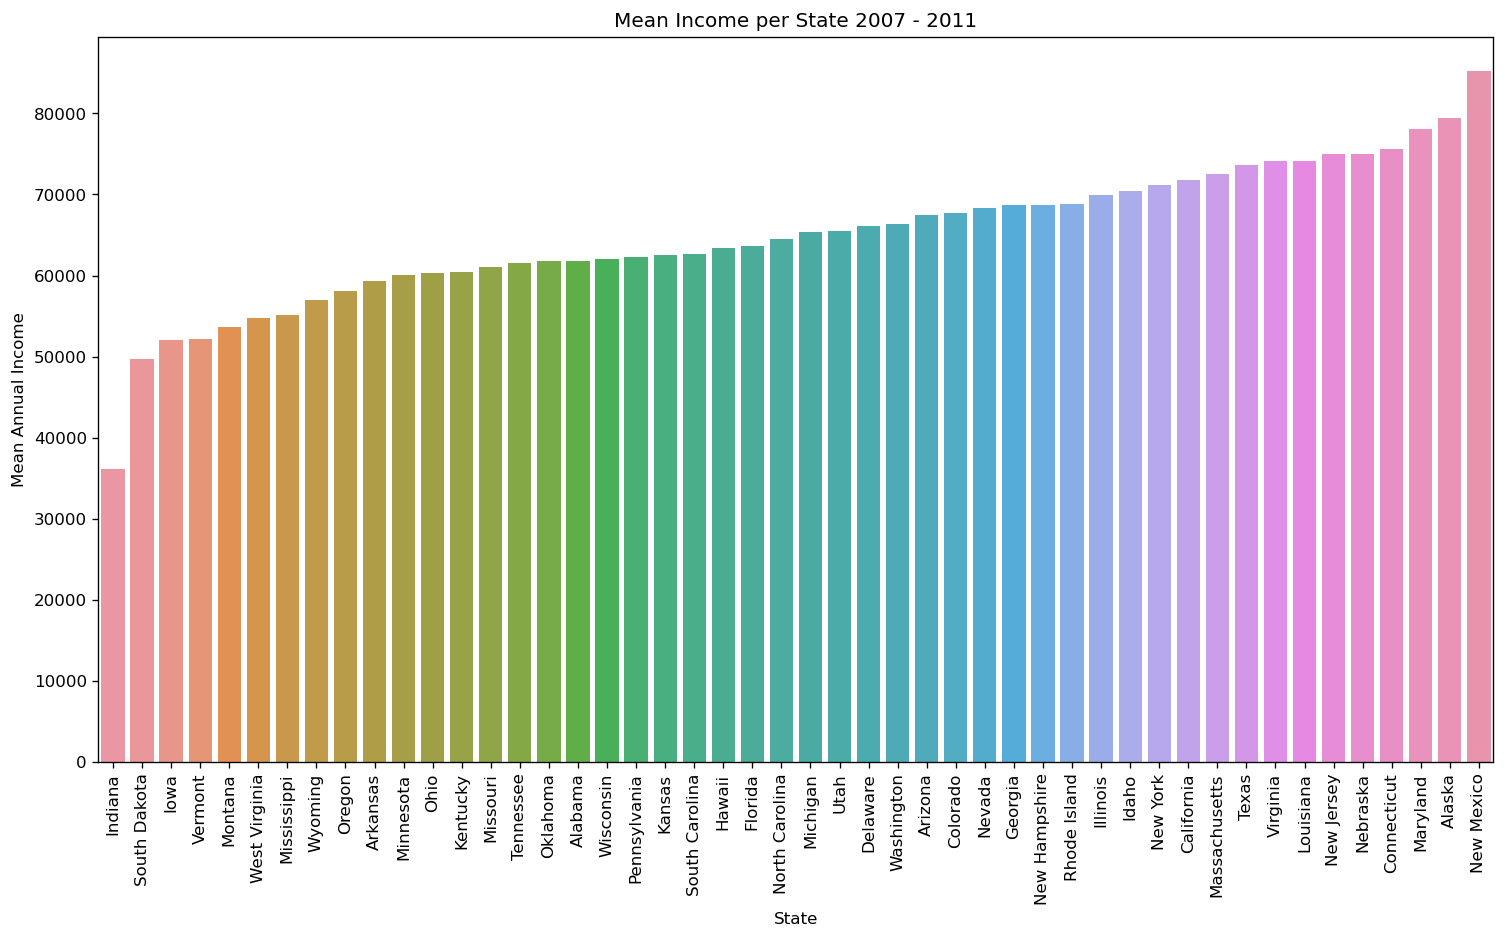

In [17]:
plt.figure(figsize=(15,8))
ordered_data = state_mean_income.sort_values('mean_annual_income').state_name
sns.barplot(x = "state_name", y = "mean_annual_income", 
            data = state_mean_income,
            order = ordered_data)
plt.xticks(rotation = 90) 
plt.title("Mean Income per State 2007 - 2011")
plt.xlabel("State")
plt.ylabel("Mean Annual Income")

For some states with a lower mean income, the application rate is higher but this is not a common trend for all.

In [29]:
loans_data['annual_inc'].describe()

count    3.828400e+04
mean     6.885303e+04
std      6.347098e+04
min      4.000000e+03
25%      4.032000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

## Loans by Year

In [18]:
total_applications = loans_data.groupby("issue_d")["loan_status"].value_counts().reset_index(name = "total_loan_applications")

In [19]:
total_applications

,issue_d,loan_status,total_loan_applications
0,2007,Fully Paid,5
1,2007,Charged Off,2
2,2008,Fully Paid,931
3,2008,Charged Off,168
4,2009,Fully Paid,4084
5,2009,Charged Off,586
6,2010,Fully Paid,9973
7,2010,Charged Off,1481
8,2011,Fully Paid,17786
9,2011,Charged Off,3268


In [20]:
applications_plot = total_applications.pivot("issue_d", "loan_status", "total_loan_applications")
applications_plot.head()

loan_status,Charged Off,Fully Paid
issue_d,,
2007,2,5
2008,168,931
2009,586,4084
2010,1481,9973
2011,3268,17786


Text(0, 0.5, 'Count')

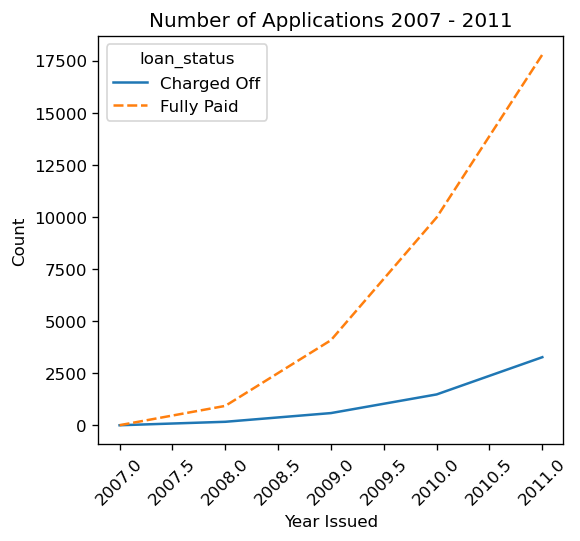

In [21]:
sns.lineplot(data = applications_plot)

plt.xticks(rotation = 45) 
plt.title("Number of Applications 2007 - 2011")
plt.xlabel("Year Issued")
plt.ylabel("Count")

In [22]:
total_applications.dtypes

issue_d                     int64
loan_status                object
total_loan_applications     int64
dtype: object

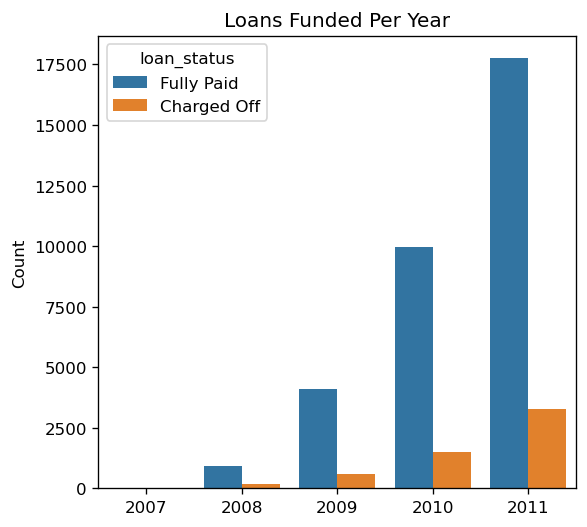

In [25]:
ax = sns.countplot(x = "issue_d", hue = "loan_status", data = loans_data)

plt.xlabel("")
plt.ylabel("Count")
plt.title("Loans Funded Per Year")
plt.tight_layout()

From the plot, it can be seen that there is a continuous increase in the number of loans being taken out during this time period.

## Earliest Credit Line

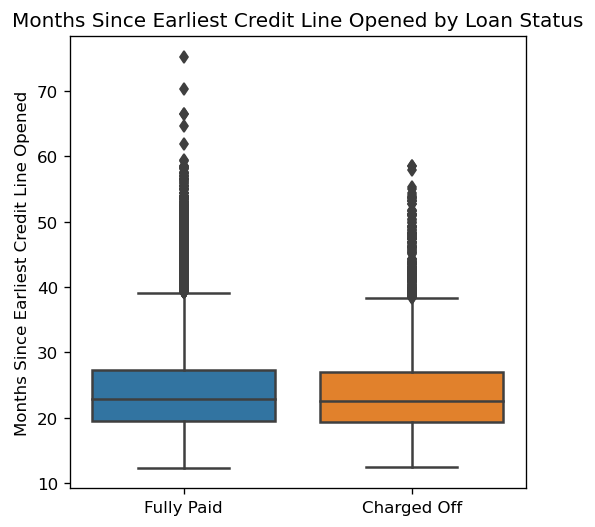

In [60]:
ax = sns.boxplot(x = "loan_status", y = "earliest_cr_line", data = loans_data)

plt.xlabel("")
plt.ylabel("Months Since Earliest Credit Line Opened")
plt.title("Months Since Earliest Credit Line Opened by Loan Status")
plt.tight_layout()

There is only a slight difference in medians, however it can be seen that applicants who opened their first credit account more recently were more likely to have not paid off their loan.

## Loan Amount

In [28]:
loans_data['loan_amnt'].describe()

count    38284.000000
mean     11156.807021
std       7408.188582
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [ ]:
The loan amount ranges from $500 to $35,000, with a mean of $11,156.81 and median of $10,000.

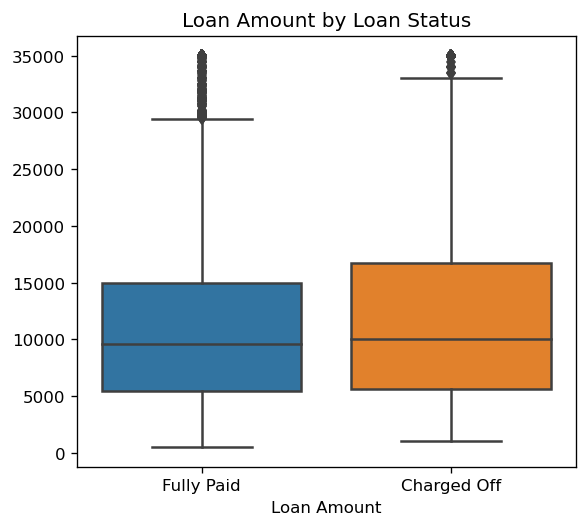

In [38]:
ax = sns.boxplot(x = "loan_status", y = "loan_amnt", data = loans_data)

plt.xlabel("Loan Amount")
plt.ylabel("")
plt.title("Loan Amount by Loan Status")
plt.tight_layout()

From the boxplot, the "Charged off" loans have had higher loan amounts lended (upper quartile higher) and a slightly higher median than fully paid loans. 

## Interest Rate

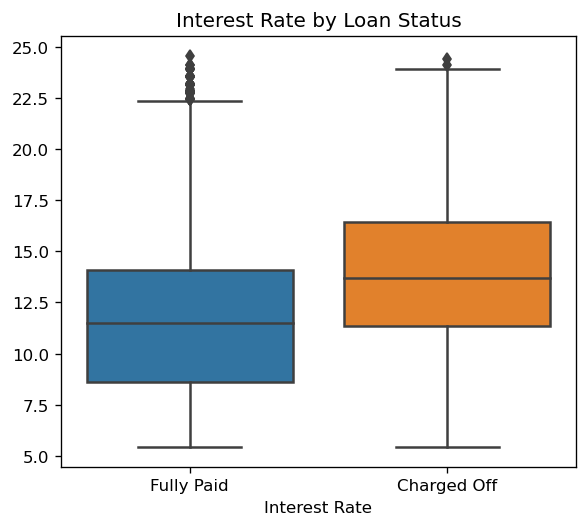

In [37]:
ax = sns.boxplot(x = "loan_status", y = "int_rate", data = loans_data)

plt.xlabel("Interest Rate")
plt.ylabel("")
plt.title("Interest Rate by Loan Status")
plt.tight_layout()

Loans with higher interest rates are more likely to be charged off.

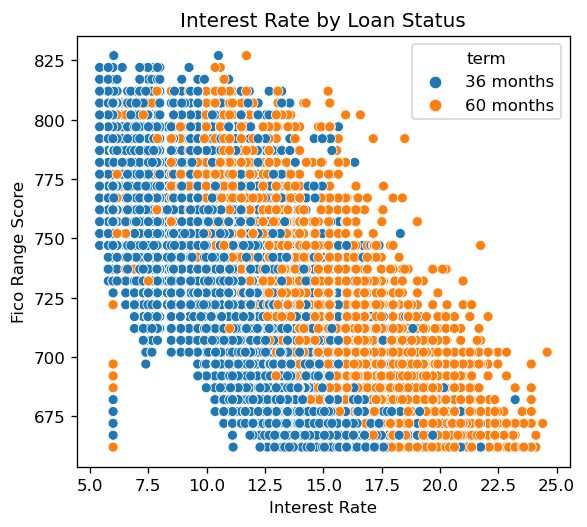

In [88]:
ax = sns.scatterplot(x = "int_rate", y = "fico_range", data = loans_data, hue = "term", 
                     x_jitter= .5,  y_jitter= .4)

plt.xlabel("Interest Rate")
plt.ylabel("Fico Range Score")
plt.title("Interest Rate by Loan Status")
plt.xlim = (5, 25)
plt.ylim = (650, 900)
plt.tight_layout()

The loans with a term of 36 months had a lower interest rate. The plot also shows that the higher the fico score, the interest rate was more likely to be lower.

## Debt to Income Ratio

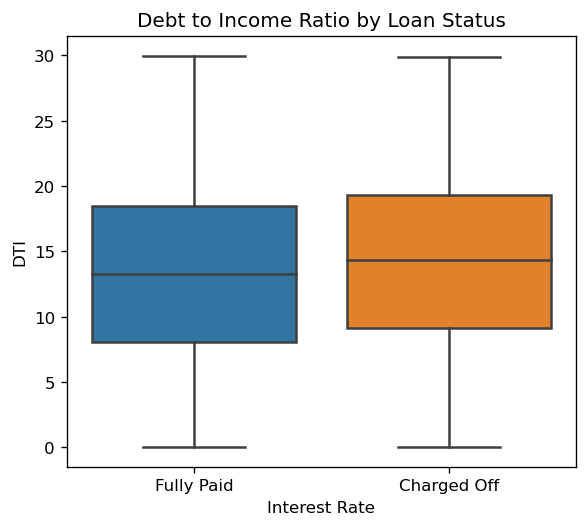

In [49]:
ax = sns.boxplot(x = "loan_status", y = "dti", data = loans_data)

plt.xlabel("Interest Rate")
plt.ylabel("DTI")
plt.title("Debt to Income Ratio by Loan Status")
plt.tight_layout()

For "Charged Off" loans, the DTI ratio of applicants is slightly higher than that of those who fully paid their loan.

## Applicant Open Accounts

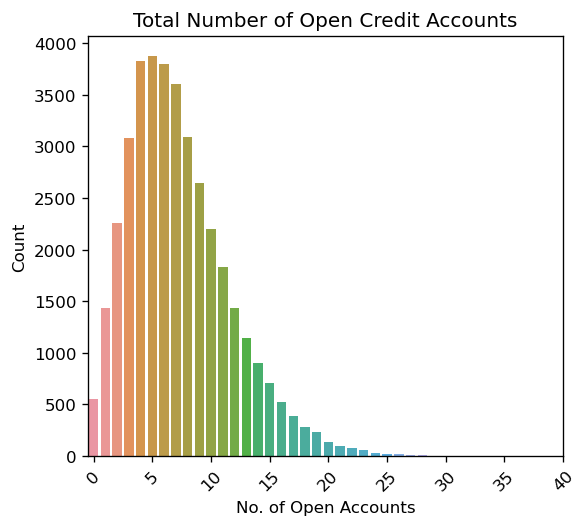

In [56]:
ax = sns.countplot(x = "open_acc", data = loans_data)

plt.xticks(rotation = 45) 
plt.xlabel("No. of Open Accounts")
plt.ylabel("Count")
plt.title("Total Number of Open Credit Accounts")
plt.xticks(np.arange(0, 45, 5), np.arange(0, 45, 5))
plt.tight_layout()

Checking loan status against number of open accounts.

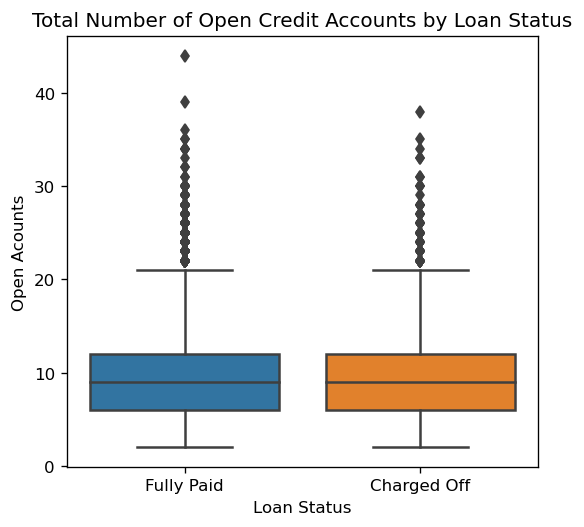

In [58]:
ax = sns.boxplot(x = "loan_status", y = "open_acc", data = loans_data)

plt.xlabel("Loan Status")
plt.ylabel("Open Acounts")
plt.title("Total Number of Open Credit Accounts by Loan Status")
plt.tight_layout()

From the plot, it can be confirmed that the number of open accounts an applicant has does not make a difference in whether a loan is paid or not.